# Final Capstone Project

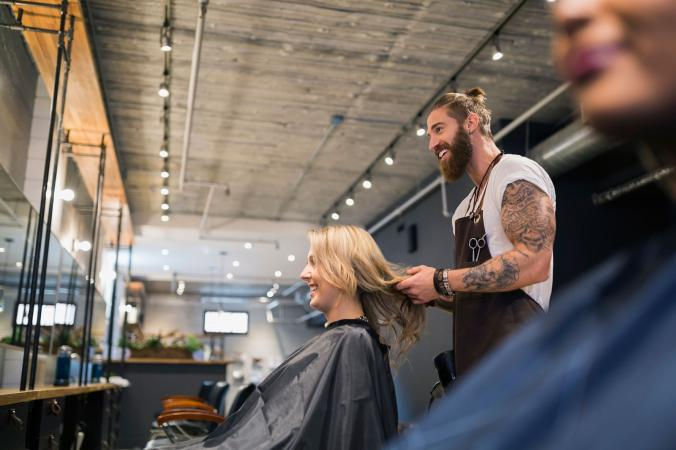

## Beauty and Hair Salons in NYC Data


Susan is a young entrepreneur who is passionate about beauty and fashion. She has made many haircare products and was proud of her success in selling her products online. One of her biggest dreams is to open her own store for her brand in New York city. Susan is also a good friend of mine, So she asked me for an advice as a Data Scientist to help her find the best neighborhood that is in need for her new idea. The goal of my research is to find neighborhoods in NYC with two conditions, highest rating in beauty salons and has a low crime rate. Then compare those neighborhood and recommend one of them to my friend as great spot to rent a store and sell her products.

The data I need for this project is the list of hair or beauty salons in NYC collected from Foursquare API. Also the crime rate per postalCode. I will compare neighborhoods to see the one that has the lowest number of hair salons and the lowest number of crimes and recommend that neighborhood to my friend Susan. I will be using Foursquare API and will fetch for venue type 'Beauty Salons' in NYC geographical location with a radius of 500 from the center of the city. I will be also using geocoder module to convert NYC into latitude and longitude values.

### New York City
New York City is one of the most known cities-symbols of the USA located in the northwestern part of the country, on the Atlantic coast. It is known as a global business capital city and one of the most populous, developed, innovative, and bustling cities of the world. New York is a true wonder of the US, and it can open its secrets and beautiful atmosphere to anyone who comes to visit it. It is located on the mouth of the Hudson River and is a destination for all kinds of tourists and guests, from business people to various tourists seeking some rest and new adventures.

Geographically, New York is a city with 5 boroughs, 59 community districts and hundreds of neighborhoods.

#### Import necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

#### Define Foursquare Credentials and Version

In [2]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = '5S0MEYEZJLTO1WXYLHBJHNF4MZV102MMIWOY2XA5DCKE0PEE' # your Foursquare ID
CLIENT_SECRET = '1AFWQD5EEUOTGPK0MAI0GHYJHZAZE3KI4HKFRYYUDSOY44DU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5S0MEYEZJLTO1WXYLHBJHNF4MZV102MMIWOY2XA5DCKE0PEE
CLIENT_SECRET:1AFWQD5EEUOTGPK0MAI0GHYJHZAZE3KI4HKFRYYUDSOY44DU


#### New York City

In [3]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


40.7127281 -74.0060152


### First Step: Search for the Venue Beauty Salon

In [26]:
from pandas import DataFrame
from pandas.io.json import json_normalize

search_query = 'Beauty Salon,hair salon,barber shops'
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, LIMIT)
url

results = requests.get(url).json()
results
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df = pd.json_normalize(venues)
df.head()



filtered_columns = ['id','name', 'location.postalCode','location.lat', 'location.lng']
df =df.loc[:, filtered_columns]

# clean columns
df.columns = [col.split(".")[-1] for col in df.columns]
df.head()

Beauty Salon,hair salon,barber shops .... OK!


,id,name,postalCode,lat,lng
0,4c61e0ad58810f47d6f5051e,Focus Beauty Hair Salon 東尼髮廊,10013,40.715472,-73.996609
1,537788db498e2b3f9dcd02d2,Michelle's Hair Beauty Salon,NaN,40.714905,-73.997696
2,51d4fdf4498e3f65eb37414f,Beauty By Clara Oh hair and make up at L'energ...,10016,40.749374,-73.983566
3,50ca8c98e4b04f44d096f9c5,Toy Apple Beauty & Barber Salon,10013,40.714592,-73.998022
4,5be1daabecb3ed00254638f1,Beauty Braids Hair Salon,10024,40.729763,-73.986676


In [28]:
df.shape


(50, 5)

### Beauty Salons in New York City map 

In [29]:
map_NYCSalons = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(df['lat'], df['lng'], df['name']):
    label = '{}, {}'.format(latitude, longitude)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NYCSalons)  
    
map_NYCSalons

### New York City zip codes by Borough
Data obtained from https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php

In [7]:
# I copied the data into a csv file and uploaded here

NYCdata = pd.read_csv("nyc_zip.csv") 
NYCdata


,ZipCode,Borough
0,10001,Manhattan
1,10002,Manhattan
2,10003,Manhattan
3,10004,Manhattan
4,10005,Manhattan
...,...,...
235,11691,Queens
236,11692,Queens
237,11693,Queens
238,11694,Queens


### Crime Rate in NYC MAP

In [8]:
crimedf = pd.read_csv('https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv')
crimedf.head()

# filter data to include crimes that is related to beauty salons

crimedf = crimedf[crimedf.PREM_TYP_DESC == 'BEAUTY & NAIL SALON']


crimeData = crimedf[['BORO_NM', 'Latitude', 'Longitude']]
crimeData.reset_index(drop=True, inplace=True)
crimeData.head()

,BORO_NM,Latitude,Longitude
0,BROOKLYN,40.654796,-73.887892
1,BRONX,40.847150,-73.832899
2,QUEENS,40.756010,-73.832377
3,MANHATTAN,40.784790,-73.977136
4,MANHATTAN,40.735675,-74.001625


### Add the Postal code column to the crime Dataset

In [9]:
for i,row in crimeData.iterrows():
    pos = str(crimeData.loc[i,'Latitude']) + ', ' + str(crimeData.loc[i,'Longitude'])
    location = geolocator.reverse(pos, timeout = 10)
    x = location.address
    commaCount = x.count(',')
    postal=''
    c=0
    if commaCount == 9:
        for address in x:
            if address == ',':
                c+=1
            if c == 8:
                postal+=address
        crimeData.loc[i,'postalCode']= postal[2:]
    if commaCount == 8:
        for address in x:
            if address == ',':
                c+=1
            if c == 7:
                postal+=address
        crimeData.loc[i,'postalCode']= postal[2:]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
crimeData

,BORO_NM,Latitude,Longitude,postalCode
0,BROOKLYN,40.654796,-73.887892,11207
1,BRONX,40.847150,-73.832899,10461
2,QUEENS,40.756010,-73.832377,11355
3,MANHATTAN,40.784790,-73.977136,10024
4,MANHATTAN,40.735675,-74.001625,10014
...,...,...,...,...
294,BROOKLYN,40.635270,-73.913664,11236
295,BROOKLYN,40.634674,-73.890656,11236
296,QUEENS,40.742956,-73.918259,11104
297,MANHATTAN,40.751646,-73.984337,10018


In [30]:
nyc_crime_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough  in zip(crimeData['Latitude'], crimeData['Longitude'],crimeData['BORO_NM']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#e54e5f',
        fill_opacity=0.7,
        parse_html=False).add_to(nyc_crime_map)  

for lat, lng, name in zip(df['lat'], df['lng'], df['name']):
    label = '{}, {}'.format(latitude, longitude)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(nyc_crime_map)  

# show the map
nyc_crime_map

In [12]:
crimeData

,BORO_NM,Latitude,Longitude,postalCode
0,BROOKLYN,40.654796,-73.887892,11207
1,BRONX,40.847150,-73.832899,10461
2,QUEENS,40.756010,-73.832377,11355
3,MANHATTAN,40.784790,-73.977136,10024
4,MANHATTAN,40.735675,-74.001625,10014
...,...,...,...,...
294,BROOKLYN,40.635270,-73.913664,11236
295,BROOKLYN,40.634674,-73.890656,11236
296,QUEENS,40.742956,-73.918259,11104
297,MANHATTAN,40.751646,-73.984337,10018


### Group crimes by postal code to find the Neighborhoods with the highest crime rate


In [13]:
crimebyPCcount = crimeData['postalCode'].value_counts().reset_index() 
crimebyPCcount.rename(columns={'index':'ZipCode','postalCode':'crimeCount'}, inplace=True)
crimebyPCcount['ZipCode']=crimebyPCcount['ZipCode'][:5]

### Now Lets Check the postal Codes with high number of beauty salons

In [14]:
salonbyPCcount = df['postalCode'].value_counts().reset_index() 
salonbyPCcount.rename(columns={'index':'ZipCode','postalCode':'salonCount'}, inplace=True)
salonbyPCcount['ZipCode']=salonbyPCcount['ZipCode'][:5]

### Add the previous Data  to my NYC dataset

In [36]:
NYCdata = NYCdata.dropna(subset=['ZipCode'])
crimebyPCcount = crimebyPCcount.dropna(subset=['ZipCode'])
salonbyPCcount = salonbyPCcount.dropna(subset=['ZipCode'])

crimebyPCcount['ZipCode']=crimebyPCcount['ZipCode'].astype(int)
salonbyPCcount['ZipCode']=crimebyPCcount['ZipCode'].astype(int)
NYCdata.head()

,ZipCode,Borough
0,10001,Manhattan
1,10002,Manhattan
2,10003,Manhattan
3,10004,Manhattan
4,10005,Manhattan


In [37]:
NYCdata["crimeCount"] = NYCdata.merge(crimebyPCcount, on="ZipCode")["crimeCount"]
NYCdata["salonCount"] = NYCdata.merge(salonbyPCcount, on="ZipCode")["salonCount"]

In [38]:
NYCdata.fillna(0,inplace=True)

In [39]:
NYCdata

,ZipCode,Borough,crimeCount,salonCount
0,10001,Manhattan,6.0,2.0
1,10002,Manhattan,7.0,3.0
2,10003,Manhattan,11.0,15.0
3,10004,Manhattan,7.0,3.0
4,10005,Manhattan,0.0,0.0
...,...,...,...,...
235,11691,Queens,0.0,0.0
236,11692,Queens,0.0,0.0
237,11693,Queens,0.0,0.0
238,11694,Queens,0.0,0.0


### Now Present the top safest and that has lowest number of competitor in each borough

### BRONX

In [40]:

NYCdata[NYCdata['Borough'] == 'Bronx'].sort_values(by=["crimeCount", "salonCount"], ascending=[True,True]) 


,ZipCode,Borough,crimeCount,salonCount
109,10451,Bronx,0.0,0.0
110,10452,Bronx,0.0,0.0
111,10453,Bronx,0.0,0.0
112,10454,Bronx,0.0,0.0
113,10455,Bronx,0.0,0.0
114,10456,Bronx,0.0,0.0
115,10457,Bronx,0.0,0.0
116,10458,Bronx,0.0,0.0
117,10459,Bronx,0.0,0.0
118,10460,Bronx,0.0,0.0


### Brooklyn

In [41]:
NYCdata[NYCdata['Borough'] == 'Brooklyn'].sort_values(by=["crimeCount", "salonCount"], ascending=[True,True]) 


,ZipCode,Borough,crimeCount,salonCount
142,11201,Brooklyn,0.0,0.0
143,11203,Brooklyn,0.0,0.0
144,11204,Brooklyn,0.0,0.0
145,11205,Brooklyn,0.0,0.0
146,11206,Brooklyn,0.0,0.0
147,11207,Brooklyn,0.0,0.0
148,11208,Brooklyn,0.0,0.0
149,11209,Brooklyn,0.0,0.0
150,11210,Brooklyn,0.0,0.0
151,11211,Brooklyn,0.0,0.0


### Manhattan

In [42]:

NYCdata[NYCdata['Borough'] == 'Manhattan'].sort_values(by=["crimeCount", "salonCount"], ascending=[True,True]) 


,ZipCode,Borough,crimeCount,salonCount
4,10005,Manhattan,0.0,0.0
5,10006,Manhattan,0.0,0.0
6,10007,Manhattan,0.0,0.0
7,10009,Manhattan,0.0,0.0
8,10010,Manhattan,0.0,0.0
...,...,...,...,...
95,10282,Manhattan,0.0,0.0
0,10001,Manhattan,6.0,2.0
1,10002,Manhattan,7.0,3.0
3,10004,Manhattan,7.0,3.0


### Queens

In [43]:
NYCdata[NYCdata['Borough'] == 'Queens'].sort_values(by=["crimeCount", "salonCount"], ascending=[True,True]) 


,ZipCode,Borough,crimeCount,salonCount
134,11004,Queens,0.0,0.0
135,11101,Queens,0.0,0.0
136,11102,Queens,0.0,0.0
137,11103,Queens,0.0,0.0
138,11104,Queens,0.0,0.0
...,...,...,...,...
235,11691,Queens,0.0,0.0
236,11692,Queens,0.0,0.0
237,11693,Queens,0.0,0.0
238,11694,Queens,0.0,0.0
